In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import numpy as np
plt.style.use('Solarize_Light2')
%matplotlib inline


# Ejercicio 5

#### Considere una muestra aleatoria $X_{1},..., X_{n}$ con función de densidad
### $$ f(x|p)= p(1-p)^{x-1}, x=1,2,... p\in (0,1)$$




#### Construya una prueba de hipótesis para el contraste $H_{0}:p=\frac{1}{2}$ vs $H_{1}:p\neq \frac{1}{2} $  de
 #### tamaño $\alpha = 0.05$

El estadistico $T(X) = \sum_{i=1}^{n} x_{i}$ es suficiente para p y se distribuye con función $BinomialNegativa (p,n)$, veremos si $g(t;p)=\binom{t-1}{n-1} p^{n}(1-p)^{t-n}$ tiene CMV

$$ \psi(t) = \frac{g(t;p_{1})}{g(t;p_{2})} = \frac{\binom{t-1}{n-1} p_{2}^{n}(1-p_{2})^{t-n}}{\binom{t-1}{n-1} p_{1}^{n}(1-p_{1})^{t-n}}=  \left ( \frac{p_{2}}{p_{1}}\right )^n\left (\frac{1-p_{2}}{1-p_{1}}\right )^{t-n} =  \left ( \frac{p_{2}(1-p_{1})}{p_{1}(1-p_{2})}\right )^n \left ( \frac{1-p_{2}}{1-p_{1}} \right )^{t}$$
Función tipo:
$$ f(t)= a^n b^t,  0<b<1 $$
Tiene Coeficiciente Monótono no creciente.


In [2]:
def psi(t, n, p2=.7, p1=.3):
    return ((p2/p1)**n)*((1-p2)/(1-p1))**(t-n)    

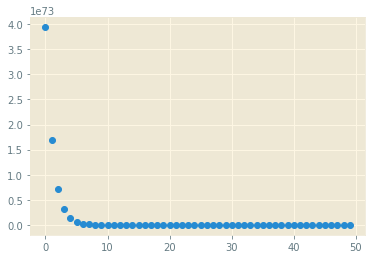

In [3]:
x=np.arange(0,50)
y=[psi(i,100) for i in x]
plt.scatter(x,y)

Por lo tanto se puede aplicar el Teorema de Karlin-Rubin para los siguientes contrastes de hipótesis:
$H_{01}: p\leq \frac{1}{2} $ vs $ H_{11}: p>\frac{1}{2}$ y $H_{02}: p\geq \frac{1}{2} $ vs $ H_{12}: p<\frac{1}{2}$ 

Podemos encontrar sus siguentes regiones de rechazo respectivamente:
$$RR_{1} = \left\{ X | \sum_{i=1}^{n} x_{i}\geq k_{\alpha_{1}}\right\}$$ con $k_{\alpha_{1}}$ que satisface 
$$\mathbb{P}(\sum_{i=1}^{n} x_{i}\geq k_{\alpha_{1}}|\theta = 1/2) = \alpha_{1}=0.025$$ o lo que es equivalente a
$$ \mathbb{P}(\sum_{i=1}^{n} x_{i}< k_{\alpha_{1}}|\theta = 1/2) = 1-\alpha_{1}=0.975$$
Analogamente
$$RR_{2} = \left\{ X | \sum_{i=1}^{n} x_{i}\leq c_{\alpha_{2}}\right\}$$ con $c_{\alpha_{2}}$ que satisface 

$$\mathbb{P}(\sum_{i=1}^{n} x_{i}\leq c_{\alpha_{2}}|\theta = 1/2) = \alpha_{2} =0.025$$

Para el contraste $H_{0}: p=\frac{1}{2}$ vs  $H_{0}: p\neq\frac{1}{2}$ como $\Theta=\{\frac{1}{2}\} = \Theta_{01}\cap\Theta_{02}$ entonces $$RR = RR_{1} \cup RR_{2} = \left\{ X |\sum_{i=1}^{n} x_{i}\geq k_{\alpha_{1}} ó \sum_{i=1}^{n} x_{i}\leq c_{\alpha_{2}}\right\}$$
tal que
$$\mathbb{P}\left (\{ \sum_{i=1}^{n} x_{i}\geq k_{\alpha_{1}}\} \cup \{ \sum_{i=1}^{n} x_{i}\leq c_{\alpha_{2}}\}|\theta = 1/2\right) =0.05 $$

#### Con ayuda de la muestra aleatoria observada, data2Ej5.txt , diga si se rechaza o no se rechaza la hipótesis nula y calcule el p-value.

Obtenemos $k_{\alpha_{1}}$ y $c_{\alpha_{2}}$

In [4]:
ruta='/home/jennifer/cdatos/sexto/estadistica/tarea2/'

In [5]:
os.listdir(ruta)

['data2Ej5.txt',
 'data2Ej4.txt',
 'data2Ej3.txt',
 'data2Ej2.txt',
 'data2Ej1.txt']

In [6]:
data = pd.read_csv(os.path.join(ruta,os.listdir(ruta)[0]))

In [7]:
##Transformacion para el modelo ocupado
data['x*']=data['x']+1

In [8]:
data

,x,x*
0,0,1
1,1,2
2,2,3
3,0,1
4,1,2
5,0,1
6,1,2
7,0,1
8,2,3
9,1,2


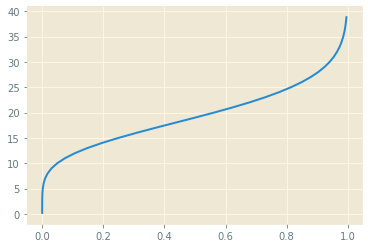

In [9]:
from scipy.stats import nbinom
n =len(data)
l=[]
for k in np.arange(0,40):
    l.append([k,nbinom.cdf(k,n,.5)])
cdf = pd.DataFrame(l, columns={'k','CDF'})
plt.plot(cdf['k'],cdf['CDF'])

In [10]:
alpha = .05

In [11]:
alphai=alpha/2

In [12]:
c = nbinom.ppf(alphai,20,1/2)
c

9.0

In [13]:
k = nbinom.ppf(1-alphai,20,1/2)
k

34.0

In [14]:
##deberia sumar alpha
nbinom.cdf(c,20,1/2) -nbinom.cdf(k,20,1/2)+1

0.05082595491777908

 $$RR = RR_{1} \cup RR_{2} = \left\{ X |\sum_{i=1}^{20} x_{i}\geq 34 ó \sum_{i=1}^{20} x_{i}\leq 9\right\}$$
 

In [15]:
suma=0
for i in data['x*'].tolist():
    suma+=i
if (suma<=c or suma>=k):
    print("Se rechaza H0")
else:
    print("No se rechaza H0")

Se rechaza H0


In [16]:
suma

40

Para obtener el p-value debemos observar lo suguiente:
$$\mathbb{P}(\sum_{i=1}^{20}x_{i} \geq 40)=1-F_{\sum x_{i}}(39 |\theta=1/2)  $$

In [19]:
(1-nbinom.cdf(39,20,1/2))

0.004320749841640881

Para rechazar tiene que suceder que $ \alpha^{*}_{1}=1-F_{\sum x_{i}}(39 |\theta=1/2)= 0.00432$

por lo tanto
$p-value=\alpha^{*} = \alpha^{*}_{1}*2 = 0.00864$

#### Graficar la funcion potencia

Obtenemos la funcion potencia:
$$ \pi(\theta) = \mathbb{P}( X \in RR) = \mathbb{P}(\sum_{i=1}^{20} x_{i}\geq 34 ó \sum_{i=1}^{20} x_{i}\leq 9) = \mathbb{P}(\sum_{i=1}^{20} x_{i}\geq 34)+\mathbb{P}(\sum_{i=1}^{20} x_{i}\leq 9)$$
$$ =F_{\sum x_{i}}(9|p)+(1-F_{\sum x_{i}}(34|p))$$

In [20]:
def pi(theta):
    return nbinom.cdf(9,20,theta)+(1-nbinom.cdf(34,20,theta))

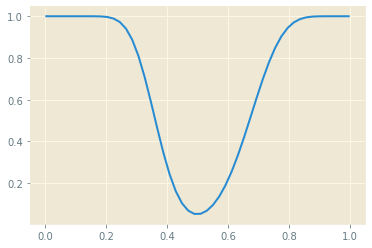

In [21]:
line=np.linspace(0.001,.999,50)
p=[pi(x) for x in line]
plt.plot(line,p)

#### Intervalo de confianza

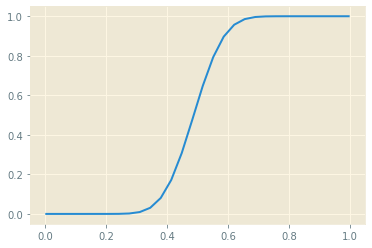

In [22]:
line = np.linspace(0,1,30)
nbin =[nbinom.cdf(20,20,x) for x in line]
plt.plot(line,nbin)

In [23]:
gamma = .95

In [24]:
gamma1 =gamma2=gamma/2

In [48]:
dmin=1

for i in np.arange(0.01,.999,.01):
    for j in np.arange(i,.999,.01):
        d =abs(i-j)
        a = 1-nbinom.cdf(40,20,i) - (1-nbinom.cdf(40,20,j))
        if (a >=gamma)and (nbinom.cdf(40,20,i)<.5) and d<dmin:
            dmin=d
            thetai=i
            thetas=j
            

print('El mejor intervalo econtrado de distancia,',dmin,' es:[',thetai,',',thetas,']')  
print('Con nivel de confianza ',1-nbinom.cdf(40,20,thetai) - (1-nbinom.cdf(40,20,thetas)))

El mejor intervalo econtrado de distancia, 0.24000000000000019  es:[ 0.22 , 0.4600000000000002 ]
Con nivel de confianza  0.9541856879889152
